# Изучение рынка заведений общественного питания Москвы

- Автор: Панченко Сергей
- Дата: 01.02.2025

### Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

**Цель:** Провести исследовательский анализ данных заведений общественного питания Москвы.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

## Данные

Для анализа поступили данные о заведениях общественного питания. Данные состоят из двух датасетов:
- `/datasets/rest_info.csv` — информация о заведениях общественного питания;
- `/datasets/rest_price.csv` —  информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
   `0` — заведение не является сетевым;
   `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
   `«Средний счёт: 1000–1500 ₽»`;
   `«Цена чашки капучино: 130–220 ₽»`;
   `Цена бокала пива: 400–600 ₽»`.
- `middle_avg_bill` — исло с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
!pip install phik -U

In [5]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix



In [6]:
!pip install phik

In [7]:
!pip install numpy==1.21.0

     |████████████████████████████████| 15.7 MB 2.1 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1


In [8]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета rest_info.csv — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [9]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [10]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет rest_info_df.csv содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов приведены к одному виду, тут проводить какие либо изменения не требуется.
Все представленные данные содержат числовые значения и хранятся в типах данных int64 или float64. Значения в столбце chain  представлены целыми числами. Данные показывают является ли заведение сетевым или нет и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
Пропуски содержатся в столбцах hours и seats. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета rest_price.csv.

In [11]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [12]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет rest_price.csv содержит 5 столбцов и 4058 строк, в которых представлена информация  о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

Названия столбцов приведены к единому виду(snake case).
Типы данных соответствуют содержимому. 
Пропуски присутствуют во всех столбцах кроме `id`. Для столбцов middle_avg_bill и middle_coffee_cup пропуски логичны, так как значения здесь зависят от столбца avg_bill(т.е. происходит распредение данных из столбца avg_bill на middle_avg_bill и middle_coffee_cup в зависимости от содержания в avg_bill, поэтому пропуски неизбежны).Значения в столбцах соответствуют описанию. 

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Первичное знакомство показывает, что данные хорошего качества — в них практически нет пропущенных значений(те которые есть вполне объяснимы), а сами данные соответствуют описанию и выглядят корректными.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [13]:
# Соединяем данные в 
df = rest_info_df.merge(rest_price_df, on='id', how='left') #единый датафрейм df


In [14]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Использовали присоединение `left` чтобы не потерять данные из датасета rest_info_df.

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [15]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [16]:
# Оптимизируем целочисленный тип данных в датафрейме df
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
# Приведём столбец category к категориальному типу данных
df['category'] = df['category'].astype('category')

In [17]:
df.dtypes

id                     object
name                   object
category             category
address                object
district               object
hours                  object
rating                float64
chain                    int8
seats                 float64
price                  object
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
dtype: object

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [18]:
# Применяем метод isna() к датафрейму df, проверим количество пропусков для каждого столбца
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Как видим пропуски присутствуют в столбцах `hours` менее 0,1% по сути с ними можно было бы ничего не делать, но в дальнейшем нам придётся создавать новый столбец на основании данного столбца, пропуски заменить не получится (т.к. в новом столбце будет всего два значения) и наверняка надо знать какая информация есть в столбце `hours`, поэтому данные пропуски придётся удалить. Достотаточно большой объём пропусков в столбце `seats` порядка 43% отсутствует информация о количестве посадочных мест, данное отсутвие информации вполне нормальное явление, далеко не все заведения указывают количество посадочных мест, особенно какие-то маленькие кафе, мы можем заменить значения на заглушку к примеру на -1, но для этого проверим диапазон значений для данного столбца,  чтобы точно понимать что заглушка будет обозначать пропуск, так же после работы с пропусками  приведём данный столбец к целлочисленому значению. 

In [19]:
min_seats = df['seats'].min()
max_seats = df['seats'].max()
print('Минимальное количество посадочных мест:', min_seats)
print('Максимальное количество посадочных мест:', max_seats)

Минимальное количество посадочных мест: 0.0
Максимальное количество посадочных мест: 1288.0


Как видим в данном столбце значения от 0.0 до 1288.0, можно использовать заглушку -1, так мы будем понимать что это пропуски

In [20]:
df['seats'] = df['seats'].fillna(-1) # меняем пропуски в столбце количество посадочных мест на значение -1

In [21]:
df.isna().sum() #проверим остались ли пропуски в столбце seats

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [22]:
df['seats'] = df['seats'].astype('int64') # приводим количество мест к целочисленному значению.

In [23]:
df.dtypes

id                     object
name                   object
category             category
address                object
district               object
hours                  object
rating                float64
chain                    int8
seats                   int64
price                  object
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
dtype: object

In [24]:
unique_price = df['price'].unique()
unique_avg_bill = df['avg_bill'].unique()
print(unique_price, unique_avg_bill)

[nan 'выше среднего' 'средние' 'высокие' 'низкие'] [nan 'Средний счёт:1500–1600 ₽' 'Средний счёт:от 1000 ₽'
 'Цена чашки капучино:155–185 ₽' 'Средний счёт:400–600 ₽'
 'Средний счёт:199 ₽' 'Средний счёт:200–300 ₽' 'Средний счёт:от 500 ₽'
 'Средний счёт:1000–1200 ₽' 'Цена бокала пива:250–350 ₽'
 'Средний счёт:330 ₽' 'Средний счёт:1500 ₽' 'Средний счёт:300–500 ₽'
 'Средний счёт:140–350 ₽' 'Средний счёт:350–500 ₽'
 'Средний счёт:300–1500 ₽' 'Средний счёт:от 240 ₽'
 'Средний счёт:200–250 ₽' 'Средний счёт:328 ₽' 'Средний счёт:300 ₽'
 'Средний счёт:от 345 ₽' 'Средний счёт:60–400 ₽' 'Средний счёт:900 ₽'
 'Средний счёт:500–800 ₽' 'Средний счёт:500–1000 ₽'
 'Средний счёт:600–700 ₽' 'Цена бокала пива:120–350 ₽'
 'Средний счёт:1000–1500 ₽' 'Средний счёт:1500–2000 ₽'
 'Цена чашки капучино:150–190 ₽' 'Средний счёт:2000–2500 ₽'
 'Средний счёт:600 ₽' 'Средний счёт:450 ₽' 'Цена чашки капучино:120–170 ₽'
 'Средний счёт:100–500 ₽' 'Средний счёт:от 850 ₽'
 'Цена чашки капучино:100–200 ₽' 'Средний счёт:250

Предлагаю в столбцах price, avg_bill пропуски заменить на значение 'нет данных', а в столбцах 'middle_avg_bill' и 'middle_coffee_cup' значения на -1 (опять же при учёте что данных значений нет проверим через min и max)

In [25]:
df['price'] = df['price'].fillna('Нет данных') # меняем пропуски в столбце price пользователей на значение нет данных
df['avg_bill'] = df['avg_bill'].fillna('Нет данных') # меняем пропуски в столбце avg_bill пользователей на значение нет данных

In [26]:
df.isna().sum() #проверим остались ли пропуски в столбцах price и avg_bill

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [27]:
min_middle_avg_bill = df['middle_avg_bill'].min()
max_middle_avg_bill = df['middle_avg_bill'].max()
min_middle_coffee_cup = df['middle_coffee_cup'].min()
max_middle_coffee_cup = df['middle_coffee_cup'].max()
print('Минимальное число с оценкой среднего чека:', min_middle_avg_bill)
print('Максимальное число с оценкой среднего чека:', max_middle_avg_bill)
print('Минимальное число с оценкой одной чашки капучино:', min_middle_coffee_cup)
print('Максимальное число с оценкой одной чашки капучино:', max_middle_coffee_cup)

Минимальное число с оценкой среднего чека: 0.0
Максимальное число с оценкой среднего чека: 35000.0
Минимальное число с оценкой одной чашки капучино: 60.0
Максимальное число с оценкой одной чашки капучино: 1568.0


In [28]:
df.isna().sum() #проверим остались ли пропуски в столбцах

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [29]:
def is_24_7(x):
    if x == 'ежедневно, круглосуточно':
        return 'True'
    else:
        return 'False'
df['is_24_7'] = df['hours'].apply(is_24_7)
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,Нет данных,Нет данных,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,Нет данных,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,Нет данных,Нет данных,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,Нет данных,Нет данных,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,Нет данных,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,Нет данных,Нет данных,NaN,NaN,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              8406 non-null   int64   
 9   price              8406 non-null   object  
 10  avg_bill           8406 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
 13  is_24_7            8406 non-null   object  
dtypes: category(1), float64(3), int64(1), int8(1), object(8)
memory usage: 870.5+ KB


- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [31]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [32]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

Тут тоже всё хорошо — каждая строка соответствует уникальному заведению. Теперь проверим корректность написания данных с названием и адресом заведения.

In [33]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='name').sum()

2792

In [34]:
df.duplicated(subset='address').sum()

2653

In [35]:
unique_name = df['name'].nunique()
unique_address = df['address'].nunique()
print(unique_name, unique_address)

5614 5753


In [36]:
for column in ['name', 'address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']



Как видим в столбцах name и address присутствуют неявные дубликаты, вероятнее всего часть информации могла задублироваться, так как собиралась из двух сервисов Яндекс Карты и Яндекс Бизнес, но вероятнее одинаковые названия связаны с тем что заведения из одной сети и соответственно имеют одинаковые названия, поэтому с названиями предлагаю ничего не делать. По  адресам так же оставить как есть, всё дело в том что по одному и тому же адресу может два или более заведений.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              8406 non-null   int64   
 9   price              8406 non-null   object  
 10  avg_bill           8406 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
 13  is_24_7            8406 non-null   object  
dtypes: category(1), float64(3), int64(1), int8(1), object(8)
memory usage: 870.5+ KB


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Два датасета объеденены в один. Явные дубликаты в данных отсутствуют.Неявные дубликаты присутствовали в двух столбцах (name и address),  я с ними ничего делать не стал, так как возможны ситуации когда два совершенно разных заведения находятся по одному адресу, это нормально и заведения одной сети имеют одинаковые названия это тоже норма..После объединения у нас осталось 7870 строк, так же мы добавили один столбец и их теперь 14, все пропуски устранены, типы данных нормализованы. Заглушки в middle_avg_bill и middle_coffee_cup ставить не стал, по факту как мне кажется они там ни к чему, только допольнительная фильтрация в дальнейшем.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [38]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

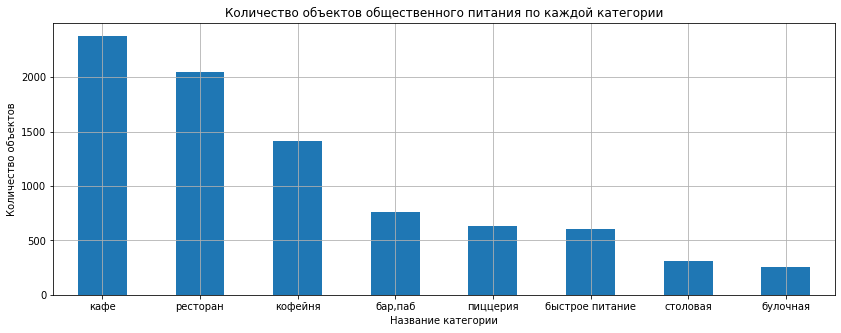

In [39]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Как видно наибольшее количество заведений по категориям это кафе - 2003 заведений, на втором месте с небольшим отставанием рестораны - 1969 заведений , на третем месте практически с двухкратным отставанием расположились кофейни - 1398 заведений, наименьшие кпо количеству заведений столовые - 306 и булочные 249 заведений.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [40]:
# Проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')


Распределение данных по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Названия слишком длинные и не поместятся на график, ниже мы создадим дубликат столбца 'district', но без части строки, а именно 'административный округ' при помощи str.replace заменим эту часть строки на пробел, данные сохраним в ноывом столбце 'district_d' его и выведем на график, суть от этого не изменится, но график будет выглядеть более читабильным.

In [41]:
# Убираем из строки 'административный округ'
df['district_d'] = df['district'].str.replace('административный округ', ' ')
print('Распределение данных по значениям столбца district_d:')
df['district_d'].value_counts()  


Распределение данных по значениям столбца district_d:


Центральный           2242
Северный               900
Южный                  892
Северо-Восточный       891
Западный               851
Восточный              798
Юго-Восточный          714
Юго-Западный           709
Северо-Западный        409
Name: district_d, dtype: int64

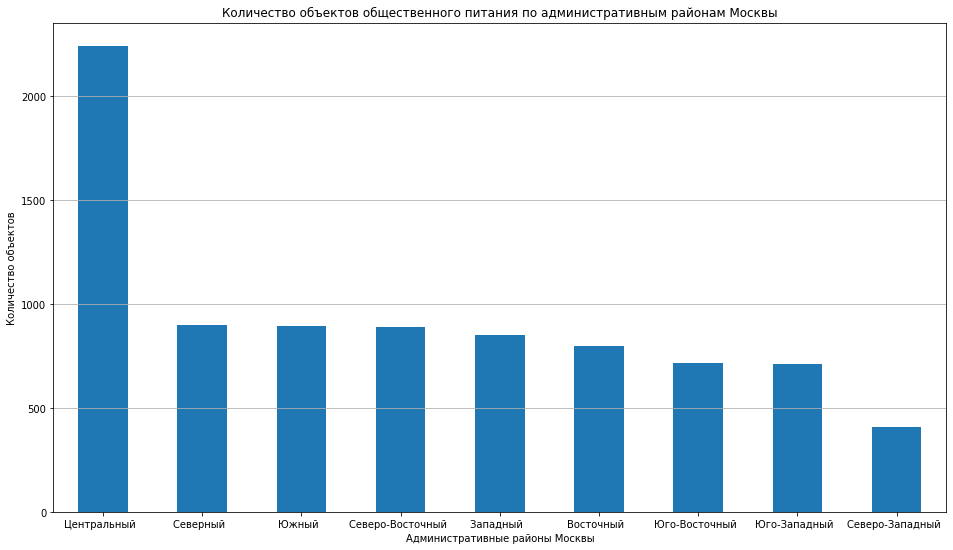

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 9))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district_d'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по административным районам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Административные районы Москвы')
plt.ylabel('Количество объектов')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Исходя из графика видно, что подавляющее большинство заведений находится в Центральном административном округе -2211, на втором и третьем местах Северный и Северо-Восточный 846 и 830 заведений соответственно, меньше всего в Юго-Восточном и Северо-Западном 629 и 369 заведения соответственно.

In [43]:
category_centr = df.loc[df['district'] == 'Центральный административный округ']['category'].value_counts()
display (category_centr)

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

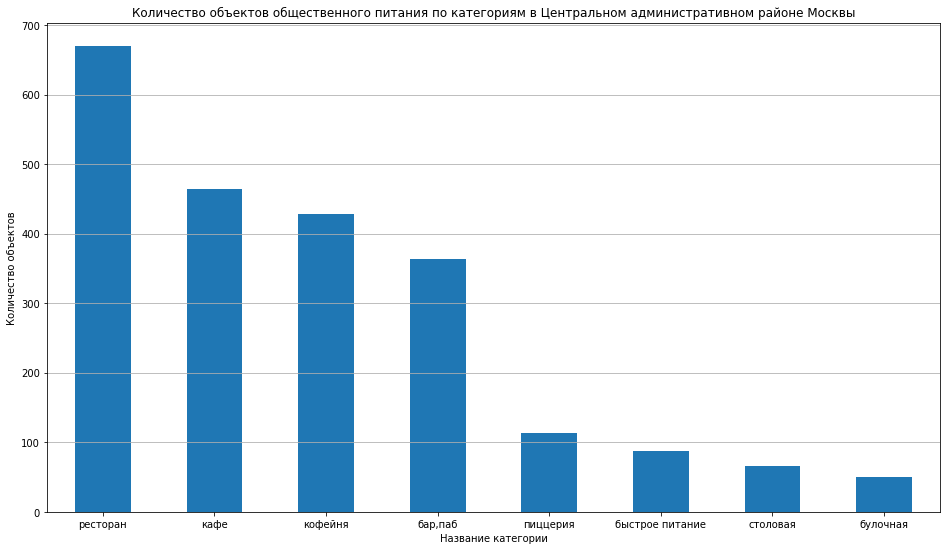

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 9))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df.loc[df['district'] == 'Центральный административный округ']['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по категориям в Центральном административном районе Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество объектов')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Исходя из данных по Центральному округу Москвы видно что с большим отрывом лидируют рестораны 665 заведения, следом расположились кафе 444 заведений и кофейни 426 заведений, меньше всего столовых 65 и булочных 50

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [45]:
# Смотрим распеределение данных по категориям где 0 не являются сетевыми, 1 являются сетевыми
category_chain = df.groupby('chain')['category'].value_counts()
display (category_chain)

chain  category       
0      кафе               1599
       ресторан           1313
       кофейня             693
       бар,паб             596
       быстрое питание     371
       пиццерия            303
       столовая            227
       булочная             99
1      кафе                779
       ресторан            730
       кофейня             720
       пиццерия            330
       быстрое питание     232
       бар,паб             169
       булочная            157
       столовая             88
Name: category, dtype: int64

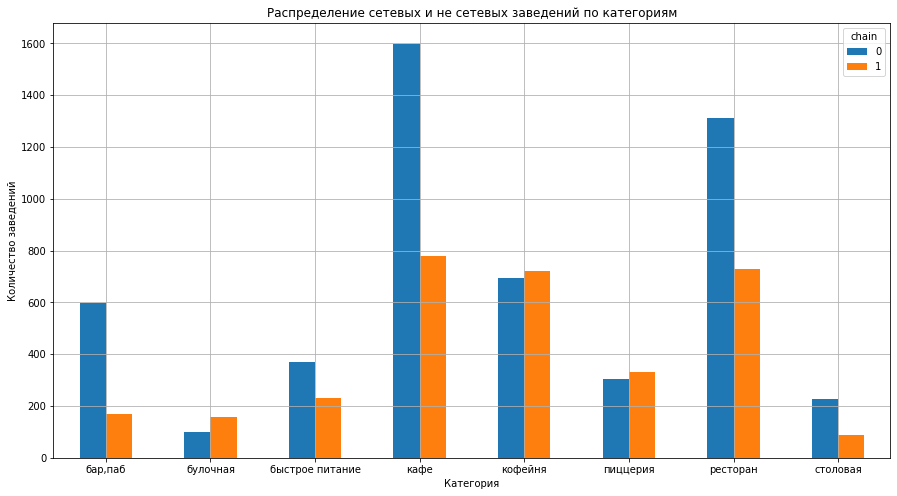

In [46]:
# Смотрим распеределение данных по категориям где 0 не являются сетевыми, 1 являются сетевыми
category_chain_1 = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
category_chain_1.plot(kind='bar',
               title=f'Распределение сетевых и не сетевых заведений по категориям',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(15, 8))
plt.grid()

# Выводим график
plt.show() 

In [47]:
# Смотрим распеределение данных где 0 не являются сетевыми, 1 являются сетевыми
print('Распределение данных по значениям столбца chain:')
df['chain'].value_counts()

Распределение данных по значениям столбца chain:


0    5201
1    3205
Name: chain, dtype: int64

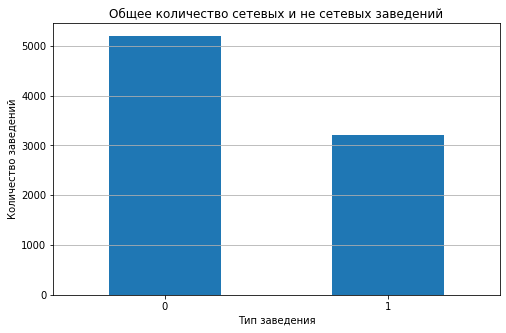

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Общее количество сетевых и не сетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [49]:
# Подсчитываем процент не сетевых и сетевых заведений
round(df['chain'].value_counts() / len(df) * 100,2)

0    61.87
1    38.13
Name: chain, dtype: float64

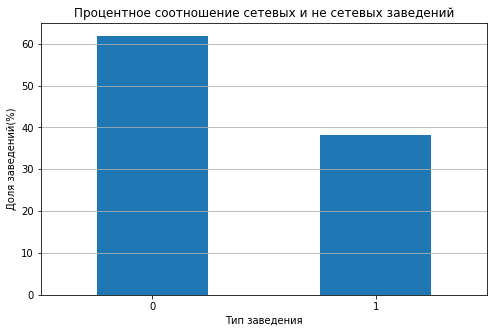

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
round(df['chain'].value_counts() / len(df) * 100,2).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Процентное соотношение сетевых и не сетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведения')
plt.ylabel('Доля заведений(%)')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Как можно увидеть подавляющее большинство заведений не сетевые по количеству 4781 против 3089 сетевых и соответственно в процентном соотношении 61% против 39% сетевых. Если смотреть в разрезе категорий то видно что подавляющее большинство как сетевых так и не сетевых заведений это кафе и рестораны. Сетевые типы заведений преобладают в булочных, кофейнях и пиццериях

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [51]:
# Смотрим распеределение данных где 0 не являются сетевыми, 1 являются сетевыми
print('Распределение данных по значениям столбца seats:')
df['seats'].value_counts()

Распределение данных по значениям столбца seats:


-1       3611
 40       253
 100      213
 60       175
 50       168
         ... 
 430        1
 420        1
 308        1
 1200       1
 600        1
Name: seats, Length: 230, dtype: int64

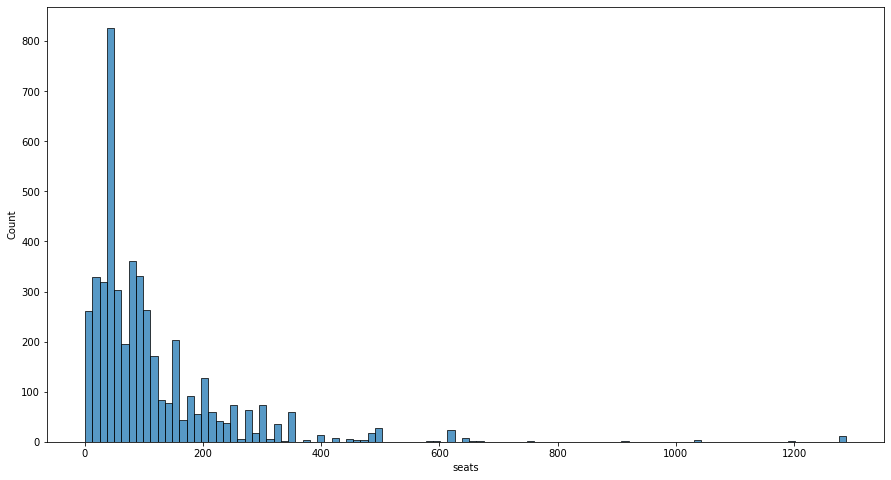

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 8))

sns.histplot(data=df[(df['seats']!= 0)&(df['seats']!= -1)], x='seats')

# Выводим график
plt.show()

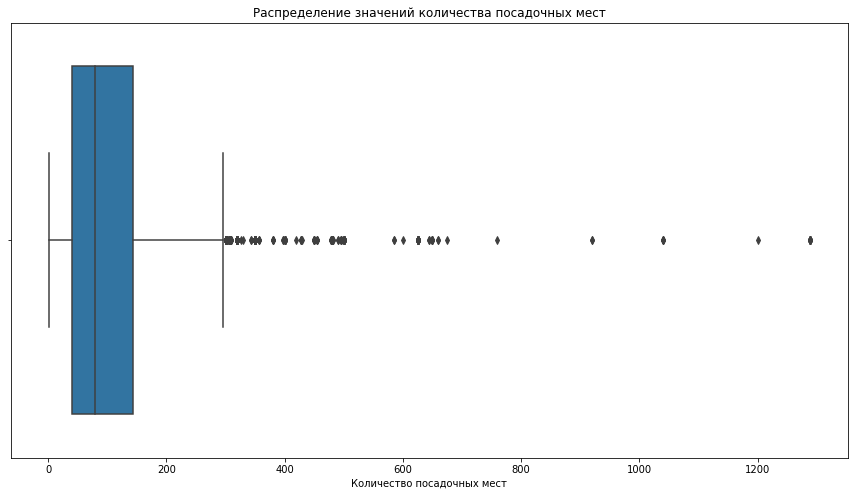

In [53]:
 #Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 8))


sns.boxplot(data=df[(df['seats']!= 0)&(df['seats']!= -1)], x='seats')
# Добавляем заголовок и метки оси
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

In [54]:
#Проверяем максимальные и минимальные значения в столбце seats
print(df['seats'].min())
print(df['seats'].max())

-1
1288


In [55]:
seats_per_cat = df[(df['seats']!= 0)&(df['seats']!= -1)].groupby('category')['seats'].median()
display(seats_per_cat)

category
бар,паб            84
булочная           52
быстрое питание    75
кафе               60
кофейня            80
пиццерия           56
ресторан           90
столовая           80
Name: seats, dtype: int64

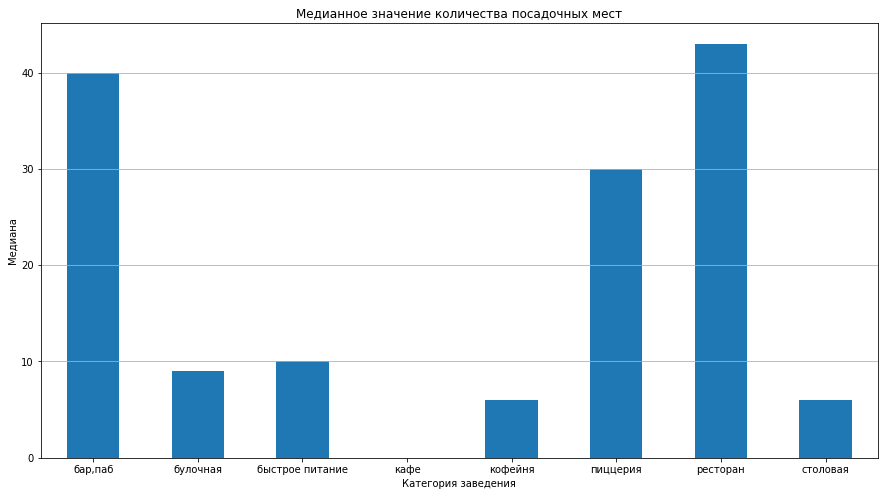

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df.groupby('category')['seats'].median().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Медианное значение количества посадочных мест'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Медиана')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Как можно видеть из распределения значений количества посадочных мест ярко выраженный правый хвост, присутствуют выбросы, значения свыше 400, но их не много и в целом конечно возможно рестораны или банкетные залы на 400+ посадочных мест ну или возможно что при ресторанах так же присутствую конференц залы.Видно что по кофейням медианное значение -1 это наша заглушка, вероятнее всего по кофейням по количеству посадочных мест больше всего пропусков и меньше информации.  

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [57]:
#Проверяем максимальные и минимальные значения в столбце rating
print(df['rating'].min())
print(df['rating'].max())

1.0
5.0


In [58]:
mean_rating = df.groupby('category')['rating'].mean()
display(round(mean_rating,2))

category
бар,паб            4.39
булочная           4.27
быстрое питание    4.05
кафе               4.12
кофейня            4.28
пиццерия           4.30
ресторан           4.29
столовая           4.21
Name: rating, dtype: float64

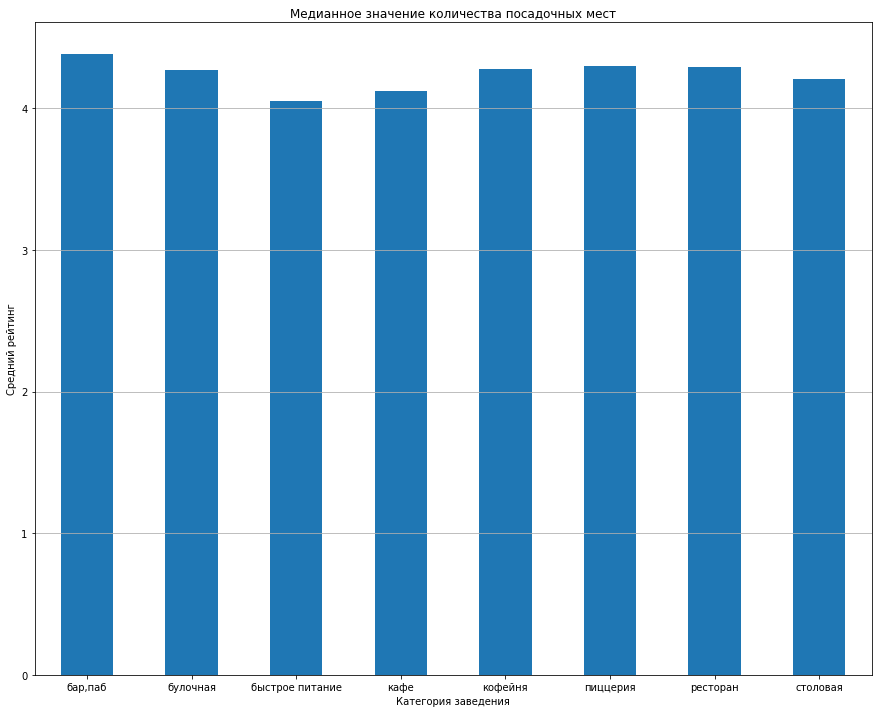

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 12))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df.groupby('category')['rating'].mean().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Медианное значение количества посадочных мест'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [60]:
mean_rating_2 = df.groupby('price')['rating'].mean()
display(round(mean_rating_2,2))

price
Нет данных       4.17
высокие          4.44
выше среднего    4.39
низкие           4.17
средние          4.30
Name: rating, dtype: float64

In [61]:
spearman_corr = df[['rating', 'seats']].corr(method='pearson')
print('Корреляционная матрица с коэффициентом Спирмена:')
display(spearman_corr)

Корреляционная матрица с коэффициентом Спирмена:


,rating,seats
rating,1.000000,0.027479
seats,0.027479,1.000000


Итак минимальное значение рейтинга 1.0 максимальное 5.0 здесь всё впорядке, аномальных значений нет. Как видно из взимосвязи рейтинга и категории заведения наиболее высокий рейтинг у баров, пабов 4,39 и кофеен 4,35 наиболее низкий же у категории быстрое питание 4,07 В целом по всем категорям рейтин выше 4, но ниже 4,5. Очень интересная взаимосвязь между рейтингом и категорией цены, она прямопропорциональнвая, т.е. чем выше цена (категория цен) тем выше рейтинг, предпалагаю что это связано не столько с ценой, а сколько со стандартами сервиса, т.е. в более дорогих местах и обслуживание вероятнее всего лучше ну и соответственно рейтинг аких заведений выше. В конце просто решил проверить корреляцию между количеством посадочных мес и рейтингом, коэфициент 0,01 говорит о корреляция том слабая, то есть взаимосвязи практически нет.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [62]:
вццц

In [63]:
# Скопируем необходимые нам для расчета столбцы в новый датафрейм
new_df = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].copy()
correlation_matrix = new_df[['rating', 'category', 'district', 'chain', 'price', 'is_24_7']].phik_matrix(interval_cols=['rating'])
correlation_matrix_seats = new_df[['rating', 'seats']].phik_matrix(interval_cols=['rating'])
# Выводим результаты
print('Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:')
display(correlation_matrix) 
display(correlation_matrix_seats)

Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:


,rating,category,district,chain,price,is_24_7
rating,1.000000,0.190003,0.200691,0.108092,0.281294,0.150173
category,0.190003,1.000000,0.174326,0.265627,0.329543,0.244789
district,0.200691,0.174326,1.000000,0.064233,0.203078,0.076392
chain,0.108092,0.265627,0.064233,1.000000,0.088850,0.043414
price,0.281294,0.329543,0.203078,0.088850,1.000000,0.063602
is_24_7,0.150173,0.244789,0.076392,0.043414,0.063602,1.000000


,rating,seats
rating,1.0,0.0
seats,0.0,1.0


<AxesSubplot:>

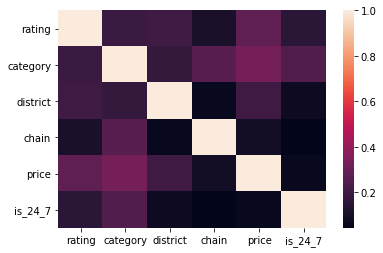

In [64]:
# Скопируем необходимые нам для расчета столбцы в новый датафрейм
new_df = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].copy()
correlation_matrix = new_df[['rating', 'category', 'district', 'chain', 'price', 'is_24_7']].phik_matrix(interval_cols=['rating'])

# Выводим результаты
sns.heatmap(correlation_matrix)


<AxesSubplot:>

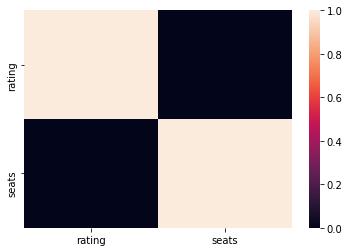

In [65]:
correlation_matrix_seats = new_df[['rating', 'seats']].phik_matrix(interval_cols=['rating'])
# Выводим результаты
sns.heatmap(correlation_matrix_seats )

Как видно из матрицы корреляции по рейтингу взаимосвязь с остальными столбцами слабая, т.е. её практически нет, наиболее высока с категорией цены 0,28, со статусом сетевого заведения и количеством посадочных мест взаимосвязи вовсе нет. Видно что существует умеренная взаимосвязь между количетвом посадочных мест и административным округом в котором располагается заведение.

In [66]:
mean_rating_2 = df.groupby('price')['rating'].mean()
display(round(mean_rating_2,2))

price
Нет данных       4.17
высокие          4.44
выше среднего    4.39
низкие           4.17
средние          4.30
Name: rating, dtype: float64

Действительно присутствует пусть и не значительная но всё же прямопропорциональная связь между ценой и рейтинргом, чем выше категория цены тем выше рейтинг. Думаю это вполне объяснимо, более высокие цены в более престижных заведениях, а в более престижных заведениях высокий уровень стандартов сервиса и соответственно ообслуживания, ну соотвественно и оценки и рейтинг будут выше.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [67]:
df['top_name'] = df.loc[df['chain'] == 1]['name'] 
top_name = df['top_name'].value_counts().head(15)
print(top_name)


Шоколадница                            120
Домино'с Пицца                          76
Додо Пицца                              74
One Price Coffee                        71
Яндекс Лавка                            69
Cofix                                   65
Prime                                   50
Хинкальная                              44
КОФЕПОРТ                                42
Кулинарная лавка братьев Караваевых     39
Теремок                                 38
Чайхана                                 37
CofeFest                                32
Буханка                                 32
Му-Му                                   27
Name: top_name, dtype: int64


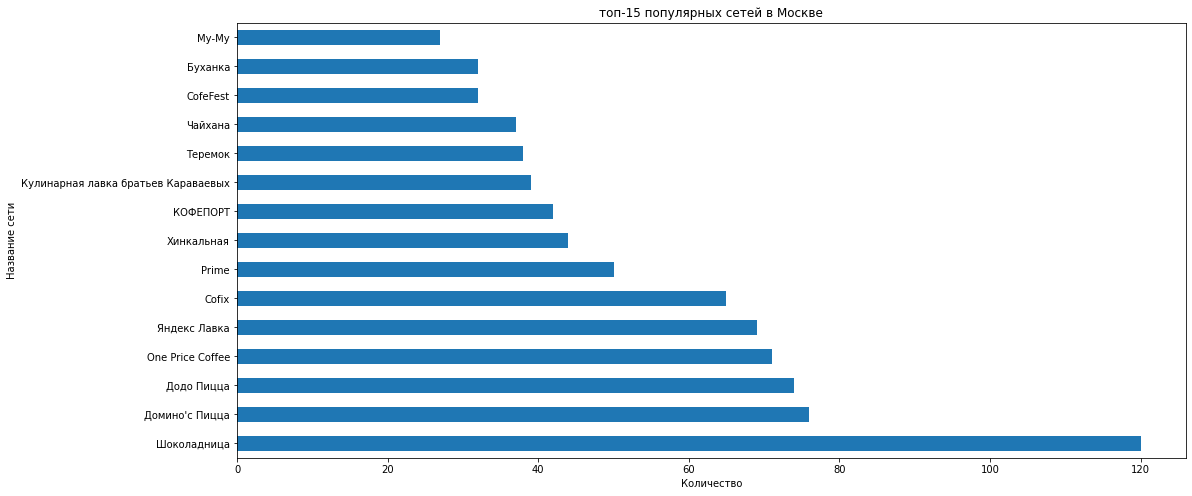

In [68]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(17, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['top_name'].value_counts().head(15).plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'топ-15 популярных сетей в Москве'
)

# Настраиваем оформление графика
plt.xlabel('Количество')
plt.ylabel('Название сети')
# Добавляем сетку графика по оси y


# Выводим график
plt.show()

In [69]:

grouped_name  = df.groupby(['top_name','category'] )['top_name'].count().sort_values(ascending=False).head(15)
print(grouped_name)

top_name                             category
Шоколадница                          кофейня     119
Домино'с Пицца                       пиццерия     76
Додо Пицца                           пиццерия     74
One Price Coffee                     кофейня      71
Яндекс Лавка                         ресторан     69
Cofix                                кофейня      65
Prime                                ресторан     49
КОФЕПОРТ                             кофейня      42
Кулинарная лавка братьев Караваевых  кафе         39
Теремок                              ресторан     36
CofeFest                             кофейня      31
Чайхана                              кафе         26
Буханка                              булочная     25
Drive Café                           кафе         24
Кофемания                            кофейня      22
Name: top_name, dtype: int64


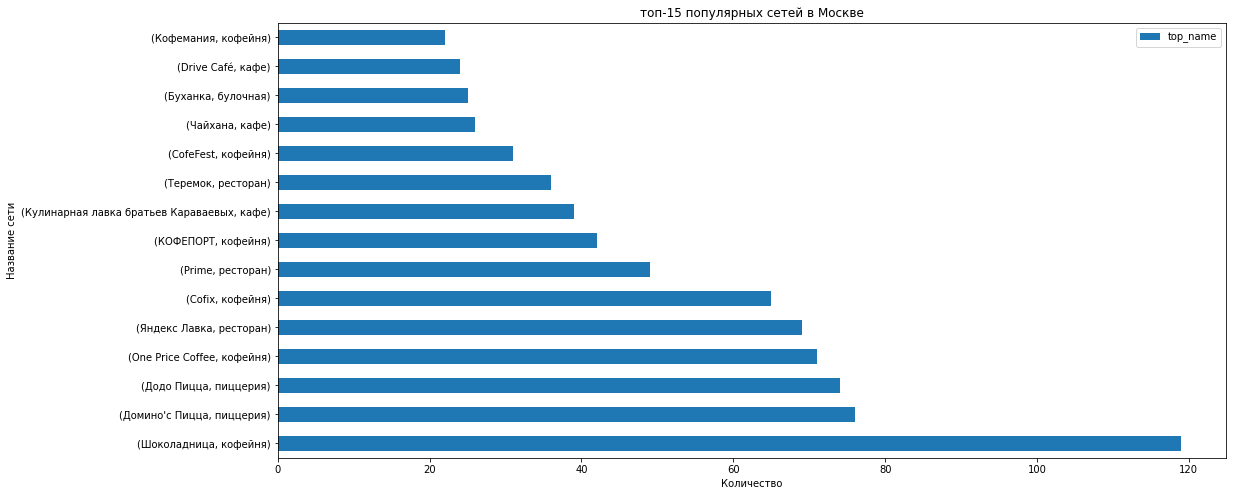

In [70]:
plt.figure(figsize=(17, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped_name  = df.groupby(['top_name','category'] )['top_name'].count().sort_values(ascending=False).head(15).plot(
               kind='barh', 
               rot=0, 
               legend=['category'],
               title=f'топ-15 популярных сетей в Москве'
)

# Настраиваем оформление графика
plt.xlabel('Количество')
plt.ylabel('Название сети')
# Добавляем сетку графика по оси y


# Выводим график
plt.show()

In [71]:
grouped_name  = df.groupby(['top_name'] )['rating'].mean()
print(grouped_name.sort_values(ascending=False).head(15))

top_name
We Cidreria              4.90
Boston seafood & bar     4.90
BigСуши                  4.90
БарБариста               4.90
Ком 1989                 4.90
Мясо на углях            4.90
Баку                     4.90
Drive                    4.90
Весна                    4.90
Ла Гатта                 4.90
I Need Doner             4.85
Dizengof99               4.85
Хинкали-Gали!            4.82
Camorra Pizza e Birra    4.80
Юг                       4.80
Name: rating, dtype: float64


Итак если обратить внимание то лидерами в Москве по количеству заведения являются Шоколадница 120 заведений, Домино'с Пицца 76 заведений и Додо Пицца 74 заведения. Топ 3 по рейтингу: We Cidreria 4.90, Boston seafood & bar 4.90, BigСуши 4.90
Ну и топ 3 по категориям это кофейня на первом месте и  на втором и третьем расположились пиццерии. Важно отметить что данные рассматривались среди сетевых заведений.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [72]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
grouped_name  = df.groupby(['district','middle_avg_bill'] )['middle_avg_bill'].count().sort_values(ascending=False)
display(grouped_name)

district                                 middle_avg_bill
Центральный административный округ       1250.0             97
                                         1000.0             76
                                         1750.0             70
                                         1500.0             55
                                         2000.0             48
                                         400.0              40
                                         300.0              34
                                         750.0              34
Западный административный округ          1250.0             32
Центральный административный округ       1100.0             30
                                         2500.0             30
                                         500.0              29
                                         2250.0             29
                                         450.0              28
                                         350.0              2

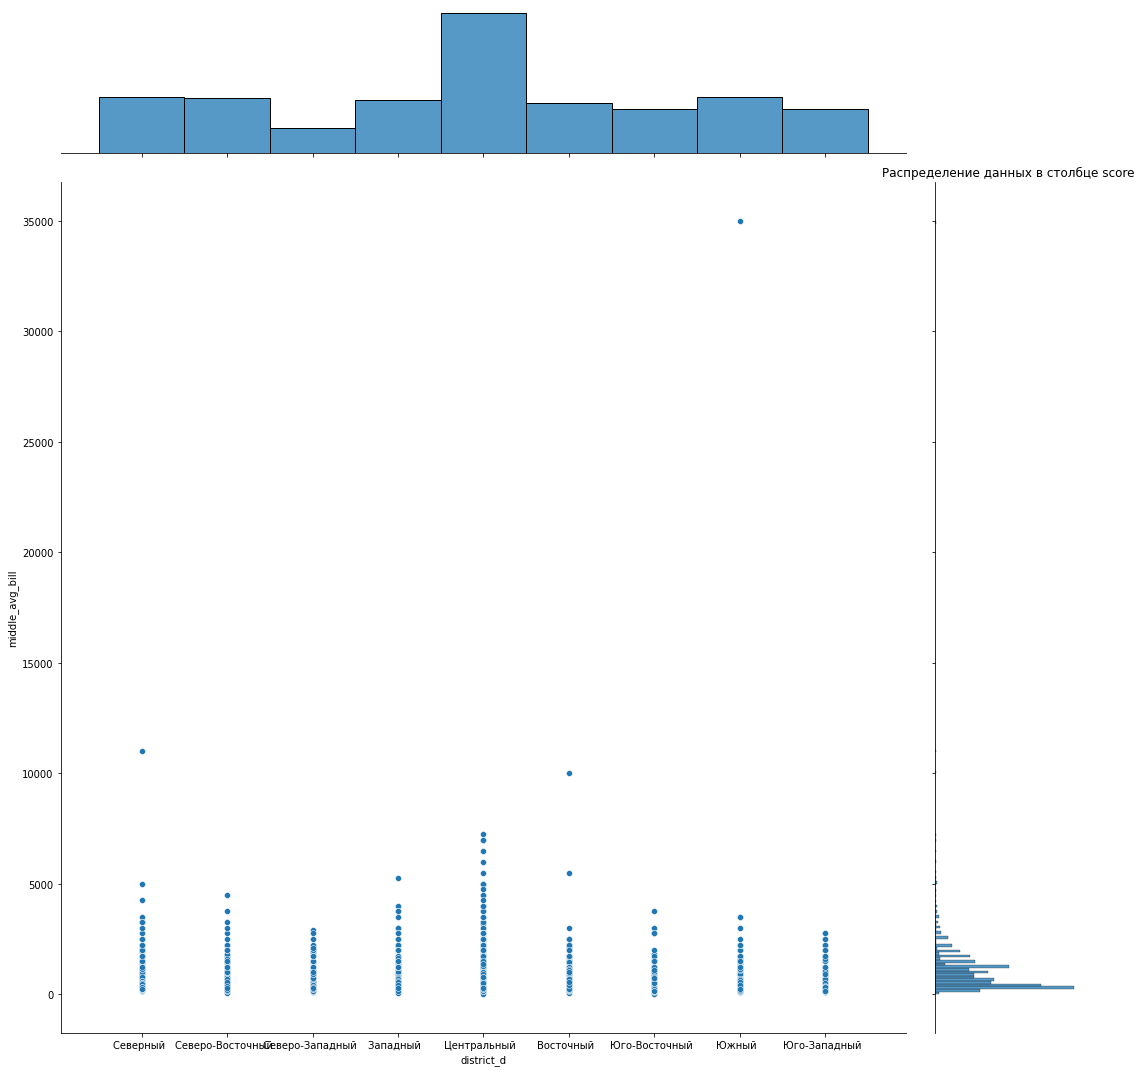

In [73]:
sns.jointplot(data=df, x='district_d', y='middle_avg_bill', height=15)

# Подписываем и отображаем график
plt.title('Распределение данных в столбце score')
plt.ylabel('Количество')
plt.show()

Как можно видеть наиболее высокие показатели среднего чека в Центральном округе, это и не удивительно, в Центре всё дороже в том числе выше цены соответственно и средний чек, у остальных окургов в среднем показатели одинаковые, наиболее низкие у Северо-Западного округа и Юго-Восточного. Ниже боле детальная информация по каждому округу отдельно. Так же в Южном округе присутствует значение среднего чека 35000М, оно единичное и крайне большое, название завдения я так понимаю что нет, это просто какое-то кафе, вероятнее всего это опечатка.

In [74]:
middle_avg_bill_ug_1 = df.loc[df['middle_avg_bill'] == 35000.0]['name'].sort_values(ascending=False).head(15)
display (middle_avg_bill_ug_1)


7177    Кафе
Name: name, dtype: object

In [75]:
middle_avg_bill_centr = df.loc[df['district'] == 'Центральный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_centr)

1250.0    97
1000.0    76
1750.0    70
1500.0    55
2000.0    48
400.0     40
750.0     34
300.0     34
1100.0    30
2500.0    30
2250.0    29
500.0     29
450.0     28
350.0     26
850.0     24
Name: middle_avg_bill, dtype: int64

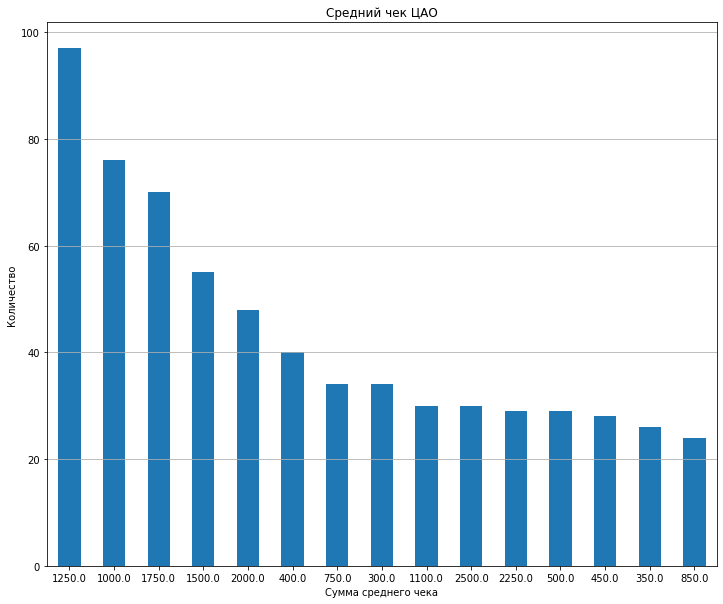

In [76]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_centr = df.loc[df['district'] == 'Центральный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [77]:
middle_avg_bill_sever = df.loc[df['district'] == 'Северный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_sever)

500.0     22
1250.0    19
300.0     17
1500.0    17
1000.0    15
1750.0    12
250.0     11
400.0     11
750.0     10
650.0      9
600.0      9
325.0      9
2000.0     9
1100.0     8
900.0      7
Name: middle_avg_bill, dtype: int64

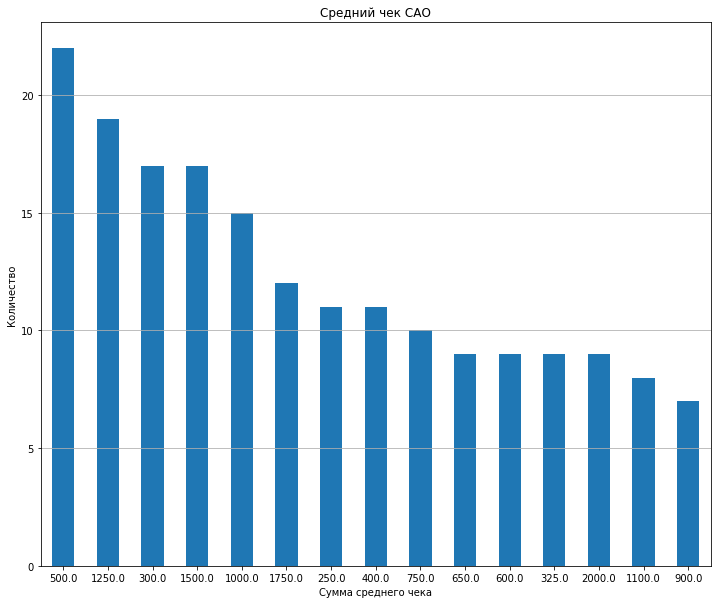

In [78]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_sever = df.loc[df['district'] == 'Северный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек САО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [79]:
middle_avg_bill_ug = df.loc[df['district'] == 'Южный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_ug)

1250.0    23
400.0     19
1500.0    18
500.0     18
300.0     14
1000.0    12
350.0     11
450.0     10
1100.0     9
425.0      9
650.0      8
375.0      8
275.0      8
200.0      8
900.0      8
Name: middle_avg_bill, dtype: int64

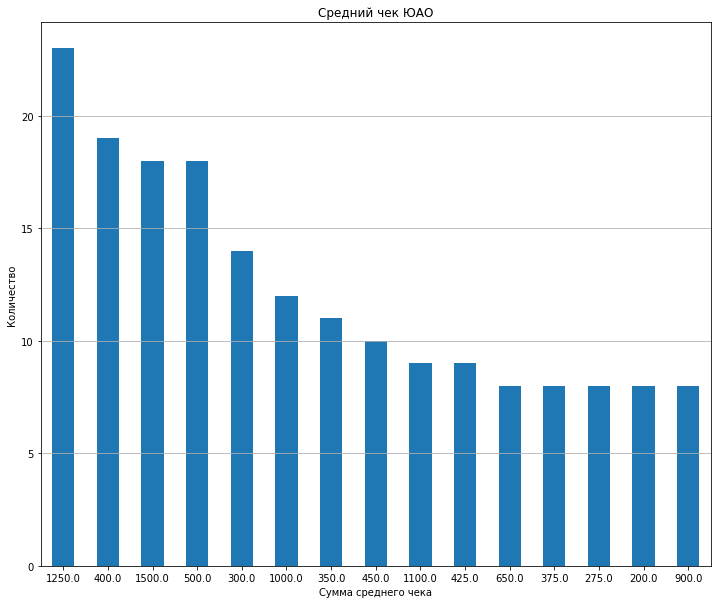

In [80]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_ug = df.loc[df['district'] == 'Южный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек ЮАО'
)
 
# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [81]:
middle_avg_bill_west = df.loc[df['district'] == 'Западный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_west)

1250.0    32
1500.0    23
1750.0    15
1000.0    14
600.0     13
1100.0    12
2000.0    12
300.0     11
400.0     10
500.0      9
350.0      9
550.0      8
2250.0     8
250.0      7
450.0      6
Name: middle_avg_bill, dtype: int64

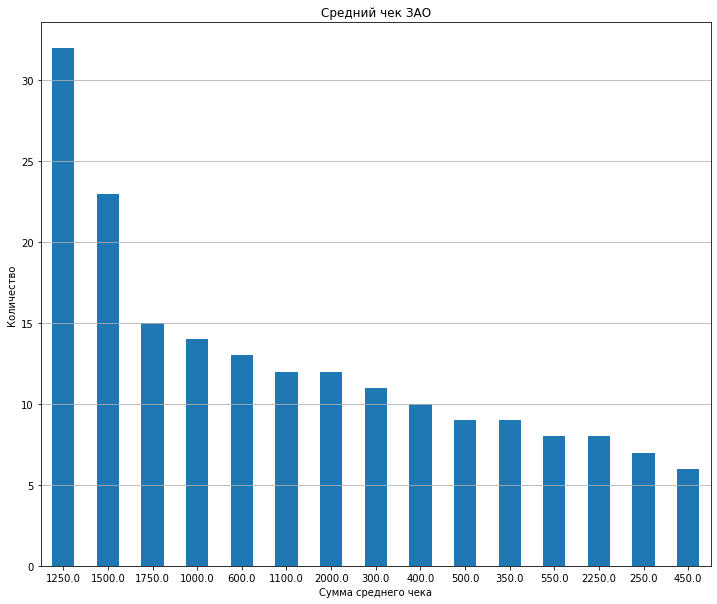

In [82]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_west = df.loc[df['district'] == 'Западный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек ЗАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [83]:
middle_avg_bill_ost = df.loc[df['district'] == 'Восточный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_ost)

1250.0    20
300.0     18
400.0     17
1000.0    11
1750.0    11
750.0     11
450.0      9
850.0      9
250.0      9
500.0      8
650.0      7
600.0      7
375.0      6
2250.0     6
1500.0     5
Name: middle_avg_bill, dtype: int64

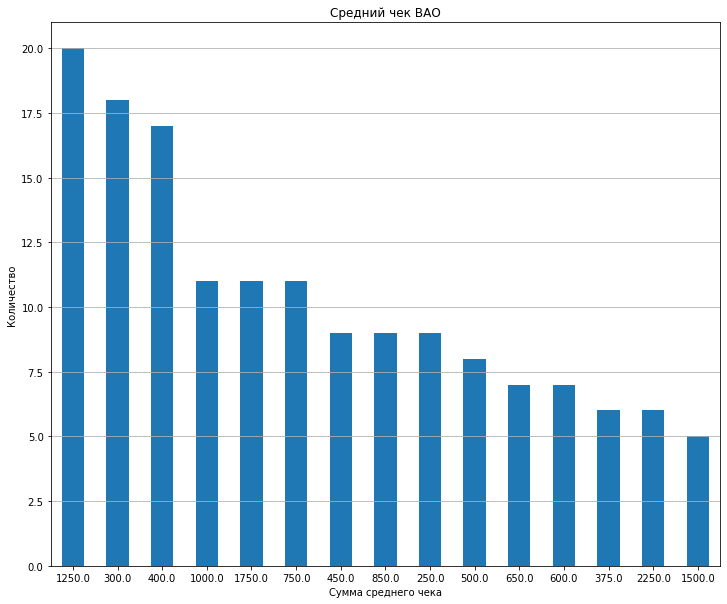

In [84]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_ost = df.loc[df['district'] == 'Восточный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек ВАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [85]:
middle_avg_bill_so = df.loc[df['district'] == 'Северо-Восточный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_so)

300.0     21
500.0     20
400.0     17
1250.0    14
350.0     13
1000.0    13
750.0     12
650.0     12
250.0     10
450.0     10
325.0      8
1500.0     7
600.0      7
425.0      6
1100.0     6
Name: middle_avg_bill, dtype: int64

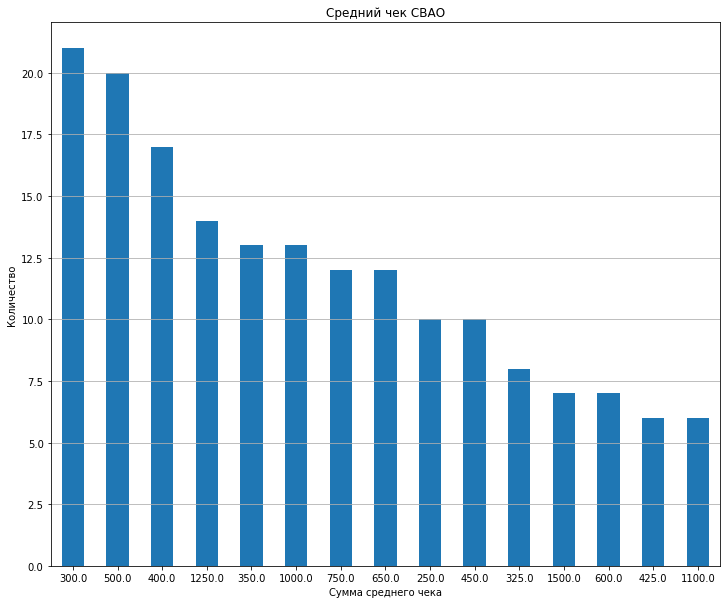

In [86]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_so = df.loc[df['district'] == 'Северо-Восточный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек СВАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [87]:
middle_avg_bill_sw = df.loc[df['district'] == 'Северо-Западный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_sw)

1250.0    14
1000.0    13
300.0      8
750.0      6
350.0      5
275.0      5
850.0      5
250.0      5
225.0      5
2000.0     5
500.0      4
1750.0     4
450.0      4
1500.0     4
375.0      4
Name: middle_avg_bill, dtype: int64

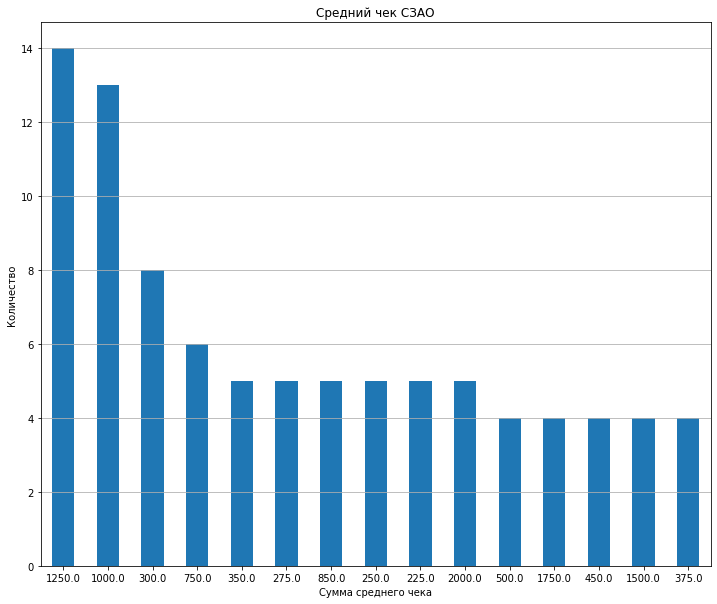

In [88]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_sw = df.loc[df['district'] == 'Северо-Западный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек СЗАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [89]:
middle_avg_bill_uo = df.loc[df['district'] == 'Юго-Восточный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_uo)

300.0     14
1250.0    10
1000.0    10
275.0      9
1500.0     8
250.0      8
400.0      7
500.0      7
750.0      7
600.0      6
375.0      6
700.0      6
200.0      5
350.0      5
450.0      5
Name: middle_avg_bill, dtype: int64

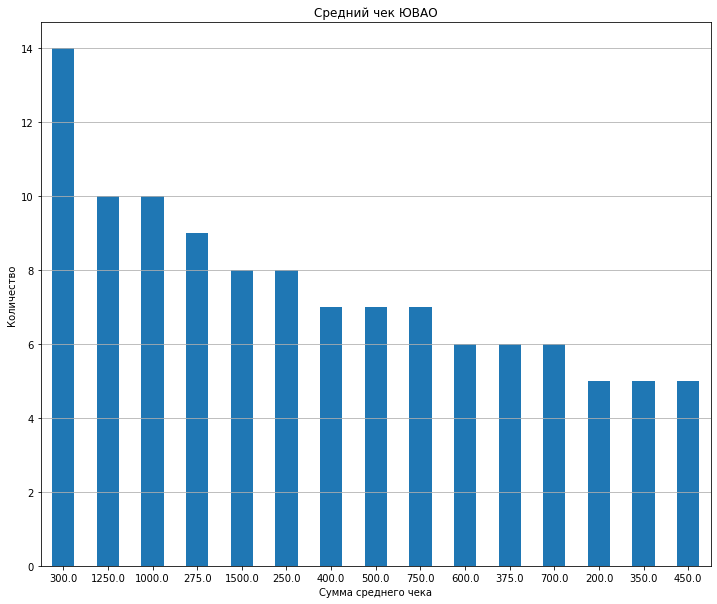

In [90]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_uo = df.loc[df['district'] == 'Юго-Восточный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек ЮВАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

In [91]:
middle_avg_bill_uw = df.loc[df['district'] == 'Юго-Западный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15)
display (middle_avg_bill_uw)

1250.0    18
350.0     12
1000.0    11
300.0     11
400.0     10
500.0      9
1500.0     9
750.0      8
1200.0     8
2000.0     8
1750.0     7
650.0      7
1100.0     7
550.0      6
600.0      6
Name: middle_avg_bill, dtype: int64

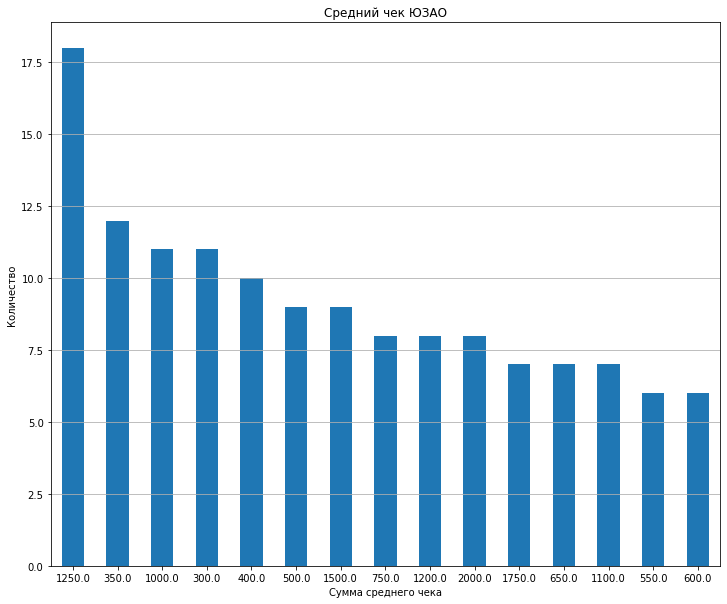

In [92]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
middle_avg_bill_uw = df.loc[df['district'] == 'Юго-Западный административный округ']['middle_avg_bill'].value_counts().sort_values(ascending=False).head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек ЮЗАО'
)

# Настраиваем оформление графика
plt.xlabel('Сумма среднего чека')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Наибольшее количество средних чеков 1250 практически по всем округам за исключением Северо-Восточный 300 и Северный 500. Получается что в Северной части столицы средний чек ниже чем в Центре и остальных округах.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [93]:
grouped_coffee = df.groupby(['district','middle_coffee_cup'] )['middle_coffee_cup'].count().sort_values(ascending=False)
display(grouped_coffee)

district                                 middle_coffee_cup
Центральный административный округ       256.0                15
                                         95.0                 12
                                         60.0                 11
                                         225.0                10
                                         250.0                 8
Западный административный округ          256.0                 7
Северный административный округ          150.0                 7
Южный административный округ             60.0                  6
Северо-Восточный административный округ  95.0                  6
Центральный административный округ       275.0                 6
Северо-Восточный административный округ  170.0                 6
Северный административный округ          95.0                  5
                                         60.0                  5
Центральный административный округ       150.0                 5
                               

In [94]:
df['middle_coffee_cup'].describe()

count     535.000000
mean      174.721495
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

In [95]:
print('Распределение данных по значениям столбца middle_coffee_cup:')
df['middle_coffee_cup'].value_counts()

Распределение данных по значениям столбца middle_coffee_cup:


256.0     43
60.0      33
95.0      32
150.0     24
170.0     18
200.0     18
225.0     15
250.0     15
135.0     14
120.0     13
165.0     13
180.0     13
160.0     11
100.0     11
125.0     10
140.0     10
139.0     10
275.0     10
175.0      9
130.0      9
110.0      9
155.0      9
90.0       9
195.0      8
220.0      8
210.0      7
185.0      7
205.0      6
270.0      5
80.0       5
184.0      5
190.0      5
300.0      5
230.0      4
149.0      4
105.0      4
260.0      4
145.0      4
215.0      4
291.0      3
245.0      3
217.0      3
240.0      3
174.0      3
115.0      3
235.0      3
127.0      3
79.0       3
266.0      3
134.0      2
204.0      2
242.0      2
179.0      2
89.0       2
124.0      2
159.0      2
94.0       2
285.0      2
255.0      2
189.0      2
199.0      2
75.0       2
290.0      2
214.0      2
237.0      1
154.0      1
169.0      1
102.0      1
325.0      1
229.0      1
297.0      1
254.0      1
265.0      1
287.0      1
144.0      1
162.0      1
375.0      1

In [96]:
grouped_coffee = df.groupby(['category','middle_coffee_cup'] )['middle_coffee_cup'].count().sort_values(ascending=False)
display(grouped_coffee)

category         middle_coffee_cup
кофейня          256.0                43
                 60.0                 33
                 95.0                 32
                 150.0                22
                 200.0                18
                 170.0                17
                 225.0                15
                 135.0                14
                 120.0                13
                 250.0                13
                 180.0                13
                 165.0                13
                 100.0                11
                 275.0                10
                 139.0                10
                 160.0                10
                 130.0                 9
                 125.0                 9
                 140.0                 9
                 155.0                 9
                 90.0                  9
                 220.0                 8
                 175.0                 8
                 110.0

In [97]:
print('Распределение данных по значениям столбца price:')
df['price'].value_counts()

Распределение данных по значениям столбца price:


Нет данных       5091
средние          2117
выше среднего     564
высокие           478
низкие            156
Name: price, dtype: int64

In [98]:
print('Распределение данных по значениям столбца avg_bill:')
df['avg_bill'].value_counts()

Распределение данных по значениям столбца avg_bill:


Нет данных                        4590
Средний счёт:1000–1500 ₽           241
Средний счёт:1500–2000 ₽           120
Средний счёт:300–500 ₽              90
Средний счёт:500–1000 ₽             78
Средний счёт:1500–2500 ₽            68
Средний счёт:700–1000 ₽             50
Средний счёт:от 1500 ₽              48
Средний счёт:1500 ₽                 43
Цена чашки капучино:239–274 ₽       43
Средний счёт:1000–2000 ₽            43
Средний счёт:1000 ₽                 43
Средний счёт:1000–1200 ₽            42
Средний счёт:300 ₽                  42
Средний счёт:от 500 ₽               41
Средний счёт:2000–2500 ₽            41
Средний счёт:200–300 ₽              41
Средний счёт:700–1500 ₽             40
Средний счёт:300–400 ₽              39
Средний счёт:500–700 ₽              38
Средний счёт:250–350 ₽              37
Средний счёт:500–1500 ₽             35
Средний счёт:500 ₽                  33
Средний счёт:400–600 ₽              33
Цена чашки капучино:от 60 ₽         33
Средний счёт:до 1000 ₽   

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Как можно видеть информация о средней стоимости одной чашки кофе представлена в основном из категории кофеен, по остальным категориям данных крайне мало и по факту они особо ни на что не влияют, наиболее часто встречающаяся стоимость 256, min 60, max 1568, встречается в одной кофейне, вероятнее всего такая стоимость конечно может быть, за какой-ниьудь очень редкий вид кофе. Опять же по стоимости исходя из тех данных чт есть лидер Центральный округ, наиболее часто там встречается стоимость 256.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.



Задачи:

Загрузить данные и познакомиться с их содержимым.
Провести предобработку данных.
Провести исследовательский анализ данных.
Сформулировать выводы по проведённому анализу.

1. В ходе исследования проанализировали данные более 8000 заведений Москввы из двух баз данных данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные включали исклбчительно справочную инфформацию. Акцент исследования был на том, чтобы найти найти категорию наиболее популярных заведений, по сути составить профиль наиболее популярного заведения. Среди них: расположение заведения (административный округ), категория заведения, рейтинг, количество посадочных мест.
2. Проведя анализ данных по более чем 8000 заведений видно что наибольшее количество заведений (2242 заведения из 8000) и наболее высокие цены, если брать географически, то в Центральном округе, если говорить о категориях то больше всего кафе(2378 заведений), ресторанов(2043 заведений) и кофеен(1413 заведений), подавляющее большинство цен имеют значение "средние", наиболее часто встречающийся счёт 1000-1500. Топ 3 наболее популярных заведений выгдит следующим образом: Шоколадница 120 заведений, Домино'с Пицца 76 заведений, Додо Пицца 74 заведения. Примерно 60% заведений не сетевые 40% сетевые. Наиболее часто встречающееся количество мест по категориям: 
- бар,паб          84
- булочная         52
- быстрое питание  75
- кафе             60
- кофейня          80
- пиццерия         56
- ресторан         90
- столовая         80.
3. Образ наиболее популярного завдения в Москве это кафе или ресторан(можно кофейня) в Центральном округе со средними ценами, со средним счётом 1000-1500, количеством мест 30-40 (сетевая или нет не имеет значения). Так же отдельно стоит обратить внимание на рейтинг, вроде как разброс по категориям не такой и большой 4,06 - 4,39 но наиболее низкий он всё таки в категории быстрое питание (4,06), в то время как в ресторанах, кафе и барах 4,30-4,39.  Даже такая не существенная разница в рейтинге для меня как для потенциального клиента она значительна, могу предположить вывод: те заведения где присутствуют стандарты сервиса имеют более высокий рейтинг (скорее всего в категории быстрое питание стандарты сервиса просто отсутствуют), так же у рейтинга присутсвует взаимосвязь с ценой(уровень корреляции 0,28, свмая большая взаимосвязь),т.е. получается чес выше уровень цен, тем выше рейтинг.
4. Для того чтобы определиться где и что открывать в первую очередь необходимо отталкиваться от инвестиционного бюджета, если выбирать самы популярный вариант  то это ресторан, кафе или кофейня 35-50 мест, Центральный округ, цены средние, для хорошего рейтинга должны быть разработаны и внедрены станадарты сервиса. Если рассматривать вариант с наименьшими затратами то можно во первых выбрать не Центральный округ(всё таки и аренда в других округах будет я думаю дешевле, жаль что по аренде данных нет), во вторых по категории что-то попроще (пиццерия, булочная). 